In [ ]:
#CO 


#Create a function that uses the dendrogram input to calculate all the quantities, and has the size and linewidth requirements of the Shetty paper
#Requires the computed dendrogram, the data from the line image, the velocity axis, and the data from the Continuum image, as well as metadata for the structures
#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
#Continuum is in Jansky/Beam, Line data should have the unit specified in the metadata as 'data_unit'
#vel,RA,Dec = scF.world[:,0,0]
def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata,ColD = True):
    SizeA,SigmaA,LuminA,CDA,SIDS,MOM0_FLUX = [[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]
    print(metadata)
    for t in Dendrogram.all_structures: 

        I = t.indices()
        Cont = True
        try:
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
            v_IWM = np.nansum(LineData[I]*(DataVel[I[0]])/u.km*u.s)/np.nansum(LineData[I])
            sig_Sh = np.sqrt(np.nansum(LineData[I]*((DataVel[I[0]])/u.km*u.s-v_IWM)**2)/np.nansum(LineData[I])) 


            #print(float((s.radius*np.pi/180*3.5/u.deg)))

            
            #Require size greater than the beam and velocity greater than the spectral resolution
            #if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(metadata['beam_area_ratio'])/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            #Shetty Def:
            #if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(metadata['beam_area_ratio'])/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            #Astrodendro Def:
            #If I require the radius to be larger than the beam I miss the clusters with this definition
            #if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and (s.radius*np.pi/180*3.5/u.deg)>np.sqrt(metadata['beam_area_ratio']*area_res)/u.pix and (s.radius*np.pi/180*3.5/u.deg)*10**6<24):
            #if(sig_Sh*(s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec)**2>3*metadata["velocity_scale"]*u.s/u.km*1*u.pix**2 and (s.radius*np.pi/180*3.5/u.deg)*10**6<20):
            #if(sig_Sh*(s.radius*3600/metadata['arc_per_pix_x']/u.deg*u.arcsec)**2>3*(np.max(I[0])-np.min(I[0]))*metadata["velocity_scale"]*u.s/u.km*1*u.pix**2 and (s.radius*np.pi/180*3.5/u.deg)*10**6<20):
            if(True):
                #The flux from the continuum
                #Convert to Jansky from Jansky per beam:
                if(ColD ==True):
                    Cont_Flux=0

                    proj = tuple(set(zip(*tuple(I[i] for i in [1,2]))))
                    for lmi in range(len(proj)):

                        Cont_Flux+=ContData[proj[lmi]]
                    Cont_Flux=Cont_Flux/(metadata['beam_area_ratioc']*(2*np.sqrt(2*np.log(2))))*u.pix**2*u.beam/u.beam*u.Jy#SHould be input as Jansky /beam and will be converted to Jansky, then to unitless. The beam is changed from FWHM to Gaussian
                    Dust_Column = Flux_to_Mass(Cont_Flux)*Num_per_kg/((s.radius*np.pi/180*3.5/u.deg)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg
                else:
                    Dust_Column=0
                
                lum = Flux_to_Lum(s.flux)

                #Flux from the strcuture
                s_flux = s.flux
                #print(s_flux/Cont_Flux,s_flux,Cont_Flux)
                #FR = s_flux/Cont_Flux

                #Line_Mass=Flux_to_Mass(freq,s_flux)/u.Hz/u.mJy/u.s/u.solMass*u.erg
                #Dust_Mass=Flux_to_Mass(freqC,Cont_Flux)#/u.Hz/u.mJy/u.s/u.solMass*u.erg
                #Dust_Column = Flux_to_Mass(Cont_Flux)*Num_per_kg/(np.sqrt(nproj_pix*(area_res)/np.pi)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg
                
                
                #print(s_flux/Dust_Column)#,Line_Mass,Dust_Mass)
                
                Index = tuple(I[i] for i in [0,1,2])
                K_Km_s_Flux=np.nansum(LineData[Index]*metadata["velocity_scale"])#Find the total flux from the structures in K km/s, assuming the input data is in K as it should be, 
                
                #Line_N = (Line_Mass/float(np.sqrt(nproj_pix*(area_res)/np.pi))/u.Mpc).to(u.kg)
                if(t.is_leaf):
                    #SizeA[0].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SizeA[0].append((float((s.radius*np.pi/180*3.5/u.deg)))) #define size as astrodendro
                    SigmaA[0].append((float(sig_Sh)))#
                    CDA[0].append(float(Dust_Column))
                    LuminA[0].append(float(lum*u.Hz*u.s/u.erg))
                    SIDS[0].append(float(t.idx))
                    MOM0_FLUX[0].append(float(K_Km_s_Flux*u.s/u.km))
                if(t.is_branch	):
                    #SizeA[1].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SizeA[1].append((float((s.radius*np.pi/180*3.5/u.deg)))) #define size as astrodendro
                    SigmaA[1].append((float(sig_Sh)))#
                    CDA[1].append(float(Dust_Column))
                    LuminA[1].append(float(lum*u.Hz*u.s/u.erg))
                    SIDS[1].append(float(t.idx))
                    MOM0_FLUX[1].append(float(K_Km_s_Flux*u.s/u.km))
    SizeA[0] = np.array(SizeA[0])
    SizeA[1] = np.array(SizeA[1])
    SigmaA[0] = np.array(SigmaA[0])
    SigmaA[1] = np.array(SigmaA[1])
    CDA[0] = np.array(CDA[0])
    CDA[1] = np.array(CDA[1])
    LuminA[0] = np.array(LuminA[0])
    LuminA[1] = np.array(LuminA[1])
    SIDS[0] = np.array(SIDS[0])
    SIDS[1] = np.array(SIDS[1])
    MOM0_FLUX[0] = np.array(MOM0_FLUX[0])
    MOM0_FLUX[1] = np.array(MOM0_FLUX[1])
    
    return np.array(SizeA),np.array(SigmaA),np.array(CDA),np.array(LuminA),np.array(SIDS),np.array(MOM0_FLUX)

#Make a function to make an image 

#Data to plot, minimum of color bar, maximum, WCS projection for coords, and position of the image in the larger figure
def Make_Plot(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    pylab.ylabel('Declination',fontsize=20,labelpad=1)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=0.1,pad=0.0)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
def Make_Plot_Anno(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show,pos1,pos2):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    pylab.ylabel('Declination',fontsize=20,labelpad=1)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=.1,pad=0.0)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(pos1,pos2),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
        
        
#Put this up here for the column density map
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    return L



#Return a cropped cube for some ra and dec, also crops the velocity axis if needed (0 for no crop)
def Crop(cube,WCS,Np1,Np2,BadVel,D2):
    NraDP1 = [int(WCS.world_to_pixel(Np1)[0]),int(WCS.world_to_pixel(Np1)[1])]
    NraDP2 = [int(WCS.world_to_pixel(Np2)[0]),int(WCS.world_to_pixel(Np2)[1])]
    if(D2==False):
        return cube[BadVel:np.shape(cube)[0]-BadVel,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    if(D2==True):
        return cube[NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,1,True)
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,2,True)


















































Num=3
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
LineN="CO-J3-2"
Name = "CO 3-2_Abs"
name = "CO_3_2_CM_Contours_DS_10_Abs.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2

Names=np.load("Names.npy")
Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names",Names)

print(Name)


paths = pylab.array(['Fixed_NGC_HCOP_J1_0.cube.reproject.Jy-kms.pbcor.fits','Fixed_NGC_HCN_J1.cube.reproject.Jy-kms.pbcor.fits','Fixed_NGC_H13CN_J1_0.cube.reproject.Jy-kms.pbcor.fits','Fixed_NGC_CO_J3_2.cube.reproject.Jy-kms.pbcor.fits','Fixed_SiJ2_1.cube.reproject.Jy-kms.pbcor.fits','Fixed_H13CoPJ1_0.cube.reproject.Jy-kms.pbcor.fits','Fixed_CCH_N1.cube.reproject.Jy-kms.pbcor.fits','Fixed_HC3N_J11.cube.reproject.Jy-kms.pbcor.fits','Fixed_NGC_H13CN.cube.reproject.mJy-kms.pbcor.fits','Fixed_NGC_HCO_Plus.cube.mJy-kms.pbcor.fits','Fixed_NGC253_HCN.cube.reproject.mJy-kms.pbcor.fits'])
path = paths[Num]

pathCont = 'Continuum_Reproject.fits'
#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#m=.115
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map
metadata = {}
metadata["distance"] = 3.5*u.Mpc

    
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratioc']=beam_area_ratioc
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc
print(pc_per_pixelc,"PC per pix")


#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True
Qp = Qp.to(u.K)
Q = Qp.spectral_slab(-0. *u.km / u.s, 500. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scF = Crop(scn,scn.wcs[:][:][0],cen_p1,cen_p2,0,False)
datn = Crop(dat,scn.wcs[:][:][0],cen_p1,cen_p2,0,False)

#Do the same thing to the continuum image
scContW =  Crop(scCont,scCont.wcs,cen_p1,cen_p2,5,True)

print(np.shape(datn),np.shape(scCont),np.max(datn))
#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scn.wcs[:][:][0],AbpRAD1,AbpRAD2,0,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))

UL1 = SkyCoord('00h47m33.8s', '-25d17m16.0s', frame='icrs')
UL2 = SkyCoord('00h47m33.5s', '-25d17m10.0s', frame='icrs')
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
SCUL = Crop(scn,scn.wcs[:][:][0],UL1,UL2,0,False)
moment_0_UL = SCUL.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot((LineN+" Moment 0"),"Moment 0 (K km/s)",moment_0_sub.hdu.data,0,0,moment_0_sub.wcs,1,1,1,True)
#Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0"),"Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number

rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmU[0][0])
######ratio
    
Np1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
NraDP1 = [int(scContW.wcs.world_to_pixel(Np1)[0]),int(scContW.wcs.world_to_pixel(Np1)[1])]
NraDP2 = [int(scContW.wcs.world_to_pixel(Np2)[0]),int(scContW.wcs.world_to_pixel(Np2)[1])]
    
bp = np.where(cSD<=7*10**22/u.cm**2)
bp2 = np.where( moment_0_sub.hdu.data < .22)
cSD[bp]=np.nan
rmU[bp]=np.nan
rmU[bp2]=np.nan
print("JJ",cSD[0][0])
#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",cSD,float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot((LineN+" Moment 0/Column Density"),"Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)

#Region of interest in upper left
cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmUL=moment_0_UL.hdu.data/cSDUL
rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmUUL[0][0])
######ratio
    
bpul = np.where(cSDUL<=7*10**22/u.cm**2)
bp2ul = np.where( moment_0_UL.hdu.data < .22)

cSDUL[bpul]=np.nan
rmUUL[bpul]=np.nan
rmUUL[bp2ul]=np.nan

z,yf,xf = np.where(SCUL.hdu.data==np.nanmax(SCUL.hdu.data))
print(xf,yf,np.shape(UpLeft.hdu.data))
xf,yf = float(xf/np.shape(UpLeft.hdu.data)[1]),float(yf/np.shape(UpLeft.hdu.data)[0])
print(type(xf),type(.5),yf)
Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster UL"),"x",moment_0_UL.hdu.data,0,np.nanmax(moment_0_UL.hdu.data),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster UL","x",cSDUL,float(np.nanmin(cSDUL*u.cm**2)),float(np.nanmax(cSDUL*u.cm**2)),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno((LineN+" Moment 0/Column Density Cluster UL"),"x",rmUUL,np.nanmean(rmUUL)*.5,abs(np.nanmean(rmUUL))*15,UpLeft.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))



header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
    print(1,freq,metadata['wavelength'])
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =scF[0][0][0].unit# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']*1.13309#beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x']#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] = np.sqrt(abs(header["CDELT1"])*u.degree**2*abs(header["CDELT2"]))
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2
print(area_res,type(area_res))

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=beam_area_ratio.value) #The main culprit
print(m)
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=beam_area_ratio.value) #The main culprit
dUL = astrodendro.Dendrogram.compute(SCUL.hdu.data,min_value=m*5,min_delta=m,min_npix=beam_area_ratio.value) #The main culprit

vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,CD,Lumin,SIDS,MOM0FLUX = Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)

##Analyze dendograms
print(np.shape(d),np.shape(dNA))




fig = plt.figure(1,figsize=(40,40))


axAlpha = pylab.subplot(5, 5, 7)
axBeta = pylab.subplot(5, 5, 8)
axGamma = pylab.subplot(5, 5, 9)
axDelta = pylab.subplot(5, 5, 10)




p1=d.plotter()
p1.plot_tree(axAlpha)
axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")


p=dNA.plotter()
p.plot_tree(axBeta)
axBeta.set_xlabel("Structure")
axBeta.set_ylabel("Flux (K)")
axBeta.set_title("No absorption region")


p=dUL.plotter()
p.plot_tree(axGamma)
axGamma.set_xlabel("Structure")
axGamma.set_ylabel("Flux (K)")
axGamma.set_title("Upper left region")


#Plot contours for the top ten clusters


#scCropped =scF.moment0().hdu.data
scCropped =scF.moment0().hdu.data
scCropped[np.where(scF.moment0().hdu.data<.22)]=np.nan
print(np.nanmean(np.nanstd(scF.moment0().hdu.data))*1)
scCropped[bp]=np.nan
axDelta = pylab.subplot(5,5,8,projection=scF.moment0().wcs)
#axBeta.imshow(scCropped.moment0().hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,norm=colors.LogNorm(vmin=5))
imBeta = axDelta.imshow(scCropped, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(scCropped)*.7 )



ColumnCon= np.concatenate((CD[0],CD[1]))
SIDScon = np.concatenate((SIDS[0],SIDS[1]))
nth =0# sorted(CD[0])[len(CD[0])-20]

G1 = True
'''
for n in range(len(CD[0])):
    
    if(CD[0][n]>=nth):
        #print(n,SIDS[0])
        if(G1):
            G1=False
            print(SIDS[0])
            print(SIDS[0][n])
            p1.plot_contour(axDelta, structure=int(SIDS[0][n]), lw=1, colors='red',label="Higest Density",alpha=1)
        else:
            p1.plot_contour(axDelta, structure=int(SIDS[0][n]), lw=1, colors='red',alpha=1)
'''
RA = axDelta.coords[0]                                                                  # 
Dec = axDelta.coords[1]

RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
axDelta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=LineN,fontsize=10,xy=(.01,1.05),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.31,1.05),xycoords="axes fraction",c="red")  

    


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]


RadsNA,SigmasNA,CDNA,LuminNA,SIDSNA,MOM0FLUXNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,CDUL,LuminUL,SIDSUL,MOM0FLUXUL = Dendro_Arrays(dUL,SCUL.hdu.data,vel,UpLeft.hdu.data,metadata)
#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)





RconNA = np.concatenate((RadsNA[0],RadsNA[1]))
SconNA = np.concatenate((SigmasNA[0],SigmasNA[1]))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)



    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)



xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])

LuminCon = np.concatenate((Lumin[0],Lumin[1]))
ColumnCon= np.concatenate((CD[0],CD[1]))

LuminConNA = np.concatenate((LuminNA[0],LuminNA[1]))
ColumnConNA= np.concatenate((CDNA[0],CDNA[1]))

MOM0FLUXcon = np.concatenate((MOM0FLUX[0],MOM0FLUX[1]))
MOM0FLUXconNA = np.concatenate((MOM0FLUXNA[0],MOM0FLUXNA[1]))
MOM0FLUXconUL = np.concatenate((MOM0FLUXUL[0],MOM0FLUXUL[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

gpNA = np.where(LuminConNA>0)
print(np.shape(RconNA),np.shape(LuminConNA))
lgpNA = LuminConNA[gpNA]
radgpNA = RconNA[gpNA]*10**6
RLpoptNA,RLpcovNA = curve_fit(func, np.array(radgpNA,dtype='float64'),np.array(lgpNA,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLNA=np.linspace(np.nanmin(radgpNA),np.nanmax(radgpNA),50)
ysRLNA = func(xsRL,RLpoptNA[0],RLpoptNA[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)
cgp = ColumnCon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6
radgpFORRAT = Rcon[gp2]*10**6
siggpFORRAT = Scon[gp2]
lumFORRAT = LuminCon[gp2]
mom0FORRAT = MOM0FLUXcon[gp2]

CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])


#Column density to Size-linewidth NA
gp2NA = np.where(ColumnConNA>0)
cgpNA = ColumnConNA[gp2NA]
rgpNA=SconNA[gp2NA]**2/Rcon[gp2NA]/10**6
radgpFORRATNA = RconNA[gp2NA]*10**6
siggpFORRATNA = SconNA[gp2NA]
lumFORRATNA = LuminConNA[gp2NA]
mom0FORRATNA = MOM0FLUXconNA[gp2NA]
CDpoptNA,CDpcovNA = curve_fit(func, np.array(cgpNA,dtype='float64') ,np.array(rgpNA,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDNA=np.linspace(np.nanmin(cgpNA),np.nanmax(cgpNA),50)
ysCDNA = func(xsCDNA,CDpoptNA[0],CDpoptNA[1])

print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

print(poptCon,pcovCon,"Size Linewidth All_structures No abs:")
print("a = ",poptConNA[0],"+-",np.sqrt(pcovConNA[0][0]))
print("b = ",poptConNA[1],"+-",np.sqrt(pcovConNA[1][1]))

print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))


print(RLpopt,RLpcov,"Radius to Luminosity No Abs:")
print("c = ",RLpoptNA[0],"+-",np.sqrt(RLpcovNA[0][0]))
print("d = ",RLpoptNA[1],"+-",np.sqrt(RLpcovNA[1][1]))



print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))



ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)



print(np.shape(Rcon*10**6),np.shape(Scon),np.shape(Rads[0]*10**6),np.shape(Sigmas[0]),np.shape(Rads[1]*10**6),np.shape(Sigmas[1]),type(Rads[0]))
#xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(Rads[0]*10**6,Sigmas[0],s=30),ax2.scatter(Rads[1]*10**6,Sigmas[1],s=30)
xpcon = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30,alpha=.7)
#p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)
p = ax2.plot(xs,ysCon)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30,alpha=.7)

xpconhh = ax2.scatter(RconUL*10**6,SconUL,label="All_structures Upper Left Region",s=30,alpha=.7)
xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])
p22 = ax2.plot(xsUL,ysUL)


st="WDS: a="+ str(np.format_float_scientific(poptCon[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[0][0]),1))+" b="+str(np.format_float_scientific(poptCon[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovCon[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")
st="SR: a="+ str(np.format_float_scientific(poptConNA[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovConNA[0][0]),1))+" b="+str(np.format_float_scientific(poptConNA[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovConNA[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.04),xycoords="axes fraction")
st="UL: a="+ str(np.format_float_scientific(poptUL[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[0][0]),1))+" b="+str(np.format_float_scientific(poptUL[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcovUL[1][1]),2))
ax2.annotate(s=st,fontsize=10,xy=(0.01,0.07),xycoords="axes fraction")
ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)







xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)




ax4.set_yscale('log')
ax4.set_xscale('log')

ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")






LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
print(np.shape(radgpUL),np.shape(lgpUL))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6


radgpFORRATUL = RconUL[gp2]*10**6
siggpFORRATUL = SconUL[gp2]
lumFORRATUL = LuminConUL[gp2]
mom0FORRATUL = MOM0FLUXconUL[gp2]

CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])




xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)
xspFNA = ax3.scatter(radgpFORRATNA,rgpNA,label="All_structures NA",s=30)
xspFUL = ax3.scatter(radgpFORRATUL,rgpUL,label="All_structures UL",s=30)

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad (pc)",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]

gp3UL = np.where(lumFORRATUL>0)
lumFORRATUL = lumFORRATUL[gp3UL]
rgpFORRATUL = rgpUL[gp3UL]
mom0FORRATUL = mom0FORRATUL[gp3UL]

gp3NA = np.where(lumFORRATNA>0)
lumFORRATNA = lumFORRATNA[gp3NA]
rgpFORRATNA = rgpNA[gp3NA]
mom0FORRATNA = mom0FORRATNA[gp3NA]

print(poptUL,pcovUL,"Size Linewidth Upper Left Region:")
print("a = ",poptUL[0],"+-",np.sqrt(pcovUL[0][0]))
print("b = ",poptUL[1],"+-",np.sqrt(pcovUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity Upper Left Region:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures",s=30,alpha=.7)

xpconhhUL = ax5.scatter(radgpFORRATUL,cgpUL,label="All_structures  Region of Interest",s=30,alpha=.7)
xpconhhNA = ax5.scatter(radgpFORRATNA,cgpNA,label="All_structures SR",s=30,alpha=.7)

ax5.set_yscale('log')
ax5.set_xscale('log')
#ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("CD  (#/cm^2)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")


#gp = np.where(FRs>0)



xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Data Set",s=30,alpha=.7)
pFUL2 = ax6.plot(xsCD,ysCD)


xspFNA = ax6.scatter(cgpNA,rgpNA,label="All_structures Sparse Region",s=30,alpha=.7)
pFNA = ax6.plot(xsCDNA,ysCDNA)


xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures Upper Left",s=30,alpha=.7)
pFUL = ax6.plot(xsCDUL,ysCDUL)

#ax6.annotate(s=st,fontsize=12,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)
xspLu2NA = ax7.scatter(radgpNA,lgpNA,label="All_structure Sparse Region",s=30,alpha=.7)
pFLLu2NA = ax7.plot(xsRLNA,ysRLNA)

xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure Region Upper Left",s=30,alpha=.7)

pFLLu = ax7.plot(xsRLUL,ysRLUL)


st = "WDS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.13),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
st2 = "UL, c = "+ str(np.format_float_scientific(RLpoptUL[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptUL[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovUL[1][1]),3))
ax7.annotate(s=st2,fontsize=12,xy=(0.01,0.07),xycoords="axes fraction")

st3 = "SR, c = "+ str(np.format_float_scientific(RLpoptNA[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[0][0]),3))+" d = "+str(np.format_float_scientific(RLpoptNA[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcovNA[1][1]),3))
ax7.annotate(s=st3,fontsize=12,xy=(0.01,0.10),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#print(FRs)




axLam = pylab.subplot(5, 5, 11)
lum_rat = axLam.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
lum_ratUL = axLam.scatter(lumFORRATUL/radgpFORRATUL**2,rgpFORRATUL,label="All_structure  Region of Interest",s=30,alpha=.7)
lum_ratNA = axLam.scatter(lumFORRATNA/radgpFORRATNA**2,rgpFORRATNA,label="All_structure  NA",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axLam.set_yscale('log')
axLam.set_xscale('log')
axLam.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axLam.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axLam.legend(prop={'size': 12},loc="upper right")
axLam.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)



#mom0_rat = axDelta.scatter(mom0FORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  Region of Interest",s=30,alpha=.7)
gp4=np.where(MOM0FLUXcon>0)
mom0FORFlux=MOM0FLUXcon[gp4]
radgpFORFlux=Rcon[gp4]*10**6
rgpFORFlux=Scon[gp4]**2/Rcon[gp4]/10**6

gp4UL=np.where(MOM0FLUXconUL>0)
mom0FORFluxUL=MOM0FLUXconUL[gp4UL]
radgpFORFluxUL=RconUL[gp4UL]*10**6
rgpFORFluxUL=SconUL[gp4UL]**2/RconUL[gp4UL]/10**6

gp4NA=np.where(MOM0FLUXconNA>0)
mom0FORFluxNA=MOM0FLUXconNA[gp4NA]
radgpFORFluxNA=RconNA[gp4NA]*10**6
rgpFORFluxNA=SconNA[gp4NA]**2/RconNA[gp4NA]/10**6


mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure  ",s=30,alpha=.7)
mom0_ratNA = axDelta.scatter(mom0FORFluxNA/radgpFORFluxNA**2,rgpFORFluxNA,label="All_structure  NA",s=30,alpha=.7)
mom0_ratUL = axDelta.scatter(mom0FORFluxUL/radgpFORFluxUL**2,rgpFORFluxUL,label="All_structure  UL",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=LineN,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()



NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")

NameColROI = (Name+"_Column_ROI")
NameLumROI = (Name+"_Luminosities_ROI")
NameRROI = (NameR+"_ROI")
NameSROI = (NameS+"_ROI")
NameFlux = (Name+"Flux_Dense")
NameRFF = (Name+"Rad_For_Flux")





v1 = d.viewer()
v1.show()
v3 = dUL.viewer()
v3.show()

np.save(NameCol,CD)
np.save(NameLum,Lumin)

np.save(NameS,Sigmas)
np.save(NameR,Rads) #Still in [leaves] [breanches] format

np.save(NameColROI,CDUL)
np.save(NameLumROI,LuminUL)

np.save(NameSROI,SigmasUL)
np.save(NameRROI,RadsUL) #Still in [leaves] [breanches] format

np.save(NameFlux,mom0FORFlux/radgpFORFlux**2)
np.save(NameRFF,rgpFORFlux)



In [46]:

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

import math
import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc
import matplotlib
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
from astrodendro.analysis import PPVStatistic


print(astrodendro.__file__)

from matplotlib.patches import Ellipse
#%matplotlib widget

#Return a cropped cube for some ra and dec, also crops the velocity axis if needed (0 for no crop)
def Crop(cube,WCS,Np1,Np2,BadVel,D2):
    NraDP1 = [int(WCS.world_to_pixel(Np1)[0]),int(WCS.world_to_pixel(Np1)[1])]
    NraDP2 = [int(WCS.world_to_pixel(Np2)[0]),int(WCS.world_to_pixel(Np2)[1])]
    if(D2==False):
        return cube[BadVel:np.shape(cube)[0]-BadVel,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    if(D2==True):
        return cube[NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol

/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16
/home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py


2. Freeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

9.999999999999682e-07 PC per pix
(34, 60) (34, 60)
0.6732816258901435
5.999999999999992e-07 PC per pix
(57, 100) (57, 100)
-21041.880386782068
5.999999999999992e-07 PC per pix
(57, 100) (57, 100)
-3093.843546025358


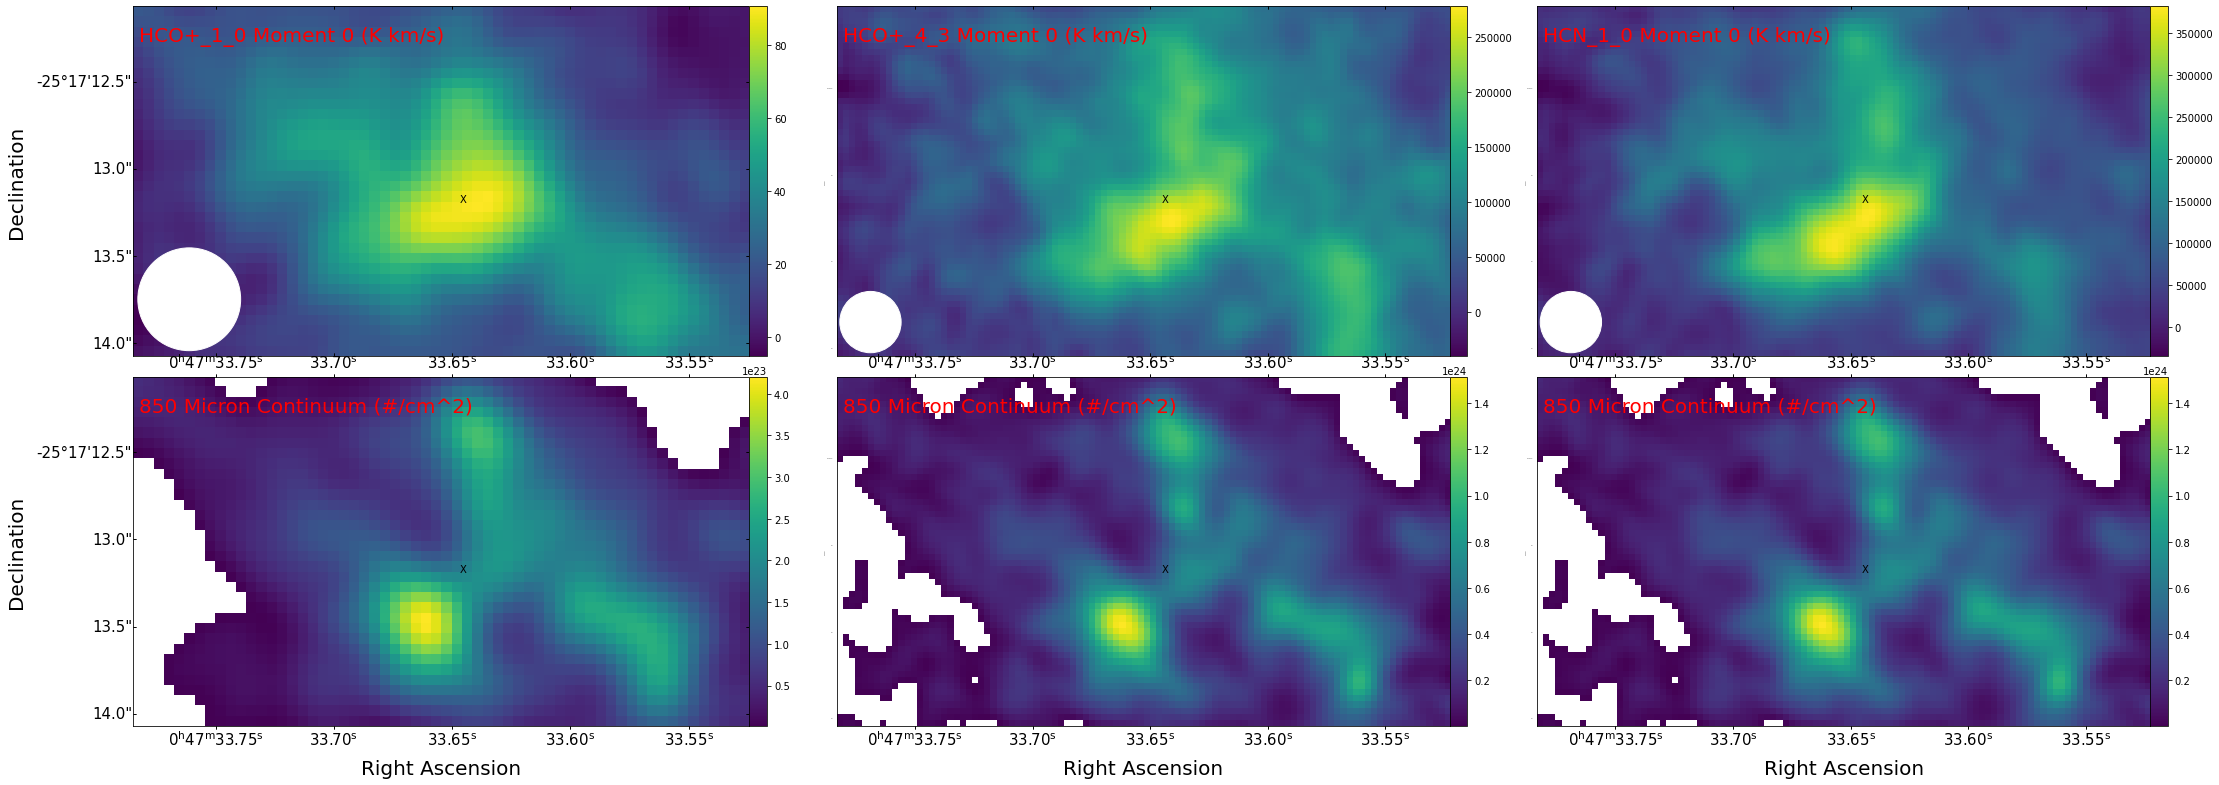

9.999999999999682e-07 PC per pix
(34, 60) (34, 60)
3.6230338939934477
6.399999999999967e-06 PC per pix
(6, 9) (6, 9)
-169492.3549091365
5.999999999999992e-07 PC per pix
(57, 100) (57, 100)
-95.71939340679083


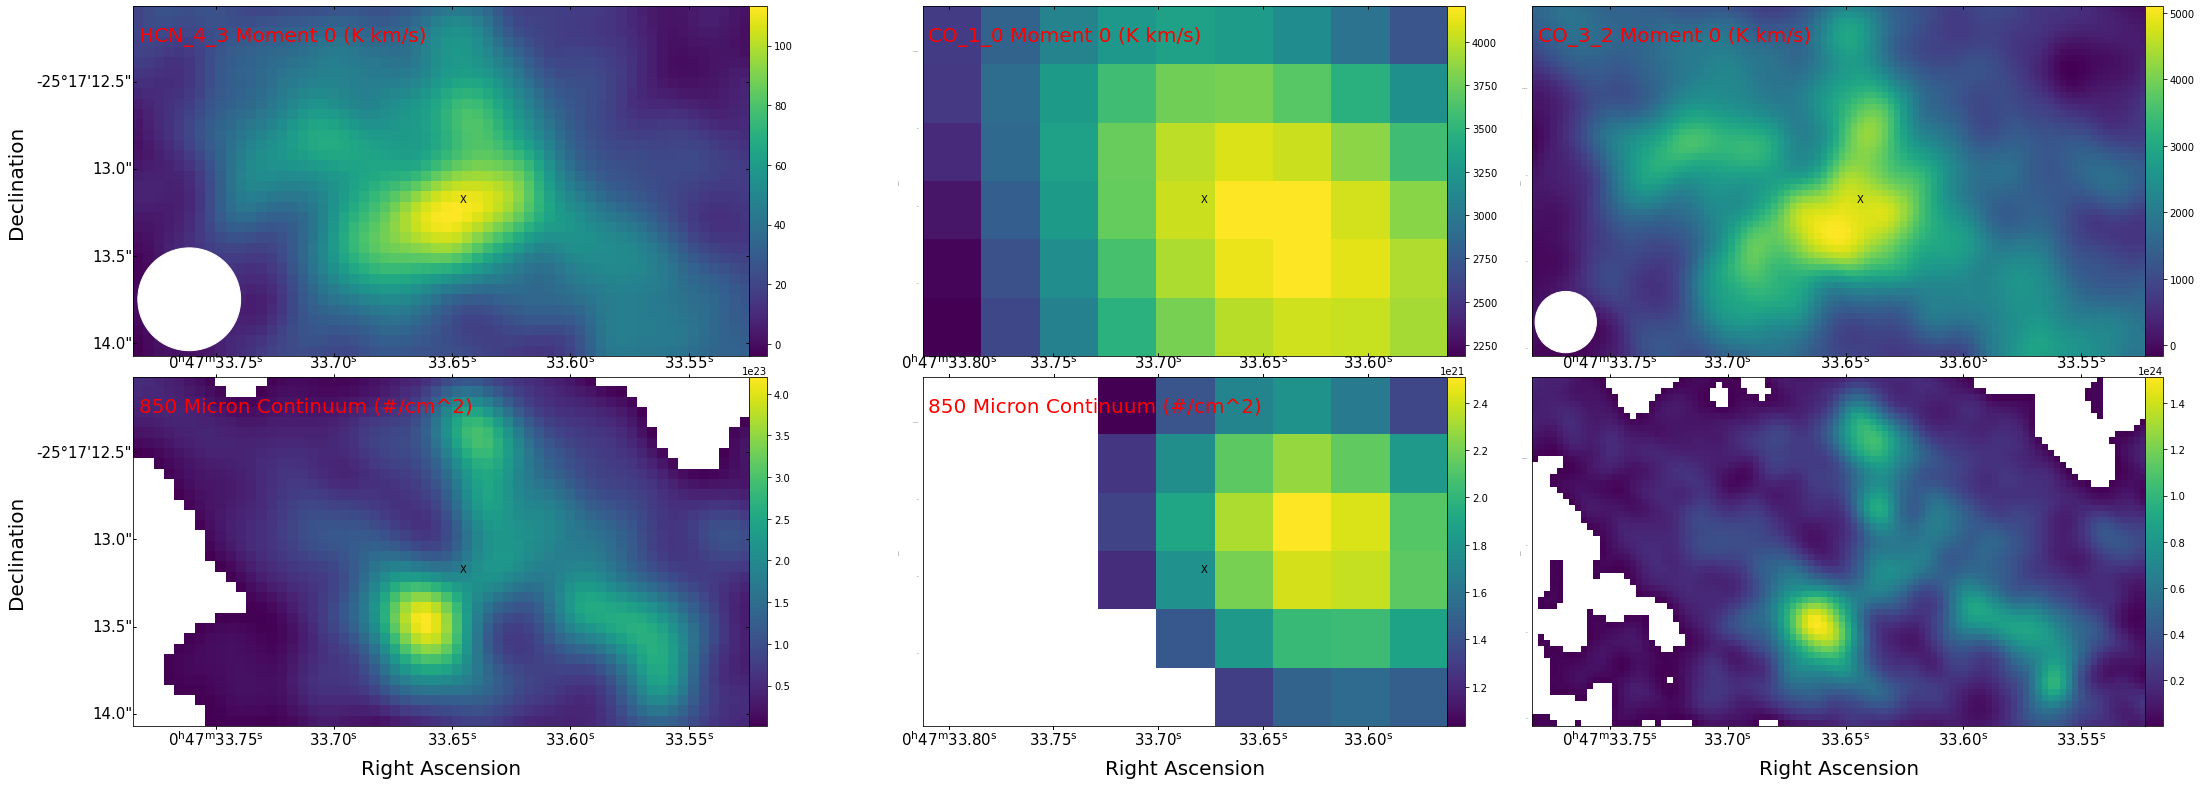

In [80]:
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2


Lines = ["HCO+_1_0","HCO+_4_3","HCN_1_0",'HCN_4_3',"CO_1_0","CO_3_2"]
paths = pylab.array(['Fixed_NGC_HCOP_J1_0.cube.reproject.Jy-kms.pbcor.fits','NGC253.HCO+_4-3_mJy_Reproject.pbcor.fits','Fixed_NGC253_HCN.cube.reproject.mJy-kms.pbcor.fits','Fixed_NGC_HCN_J1.cube.reproject.Jy-kms.pbcor.fits','Fixed_NGC_CO_J1_0.cube.reproject.K-kms.pbcor.fits','Fixed_NGC_CO_J3_2.cube.reproject.Jy-kms.pbcor.fits'])

beam_rad_pix=5
Ram_Limiter=1
pathCont = 'Continuum_Reproject.fits'
pathCont2 ='Continuum_Reproject_5pc_beam.fits'
pathCont3 = 'Continuum_Reproject_32pc_beam.fits'
#path='HCOp_J1-0.cube.fits'

fig = plt.figure(1,figsize=(30,10))
#fig, axs = pylab.subplots(2, 6, figsize=(60, 20), sharey=True)
#pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)
for i in range(0,3):
    path = paths[i]
    if(i==1 or i ==2):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
    if(i==5):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
    if(i==0 or i ==3):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont2)[0])
    if(i==4):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont3)[0])

    #Put this up here for the column density map
    metadata = {}
    metadata["distance"] = 3.5*u.Mpc


    arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
    arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
    beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
    beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
    beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
    metadata['beam_area_ratioc']=beam_area_ratioc
    pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc
    print(pc_per_pixelc,"PC per pix")


    #Make subcube
    Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
    Qp.allow_huge_operations=True
    Q = Qp.to(u.K)

    sc = Q.unmasked_copy()
    #scQ = Q
    scW = sc.wcs[:][:][0]


    dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
    scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
    datn=dat
    scF=scn
    

    UL1 = SkyCoord('00h47m33.78s', '-25d17m14.0s', frame='icrs')
    UL2 = SkyCoord('00h47m33.52s', '-25d17m12.0s', frame='icrs')
    scWCS = scF.wcs[:][:][0]
    UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,0,True)
    SCUL = Crop(scn,scn.wcs[:][:][0],UL1,UL2,0,False)
    moment_0_UL = SCUL.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
    ######Moment 0 for both

    #Region of interest in upper left
    cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
    print(np.shape(cSDUL),np.shape(moment_0_UL.hdu.data))
    rmUL=moment_0_UL.hdu.data/cSDUL
    rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
    rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
    print(rmUUL[0][0])
    ######ratio

    bpul = np.where(cSDUL<=.1*10**22/u.cm**2)
    bp2ul = np.where( moment_0_UL.hdu.data < .22)

    cSDUL[bpul]=np.nan
    rmUUL[bpul]=np.nan
    rmUUL[bp2ul]=np.nan
    if i ==0:

        xf=.53
        yf=.44
    #Make_Plot_Anno((LineN+" Moment 0 (K km/s) Cluster UL"),"x",moment_0_UL.hdu.data,0,np.nanmax(moment_0_UL.hdu.data),UpLeft.wcs,1,1,1,True,xf,yf)
    #Make_Plot_Anno("Column Density Upper Left Cluster UL","x",cSDUL,float(np.nanmin(cSDUL*u.cm**2)),float(np.nanmax(cSDUL*u.cm**2)),UpLeft.wcs,1,1,1,True,xf,yf)

    
    
    ax = pylab.subplot(2,3,i+1,projection=moment_0_UL.wcs) 
    
    RA = ax.coords[0]                                                                  # 
    
    im = ax.imshow(moment_0_UL.hdu.data)
    
    RA.set_ticks(size=-3)                                                                                      
    
    RA.set_ticklabel(exclude_overlapping=True) 
    
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    if(i==0):
        Dec = ax.coords[1]
        Dec.set_ticks(size=-3) 
        Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
        pylab.ylabel('Declination',fontsize=20,labelpad=1)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    else:
        Dec = ax.coords[1]
        pylab.ylabel('',fontsize=0,labelpad=1)
        Dec.set_ticks(size=0) 
        ax.tick_params(axis = 'x', which = 'major', labelsize = 15)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 0)  
    
    
    
    cb=pylab.colorbar(im,fraction=.03,pad=0.0)                                     
                                 
    #cb.set_label(label=Lines[i]+" Moment 0 (K km/s)",fontsize=15,rotation=0,labelpad=5) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    
    #pylab.annotate(s=Name2,fontsize=10,xy=(pos1,pos2),xycoords="axes fraction")  
    ax2 = pylab.subplot(2,3,i+4,projection=UpLeft.wcs) 
    im2 = ax2.imshow(cSDUL)
    RA2 = ax2.coords[0]   
    # 
    
    RA2.set_ticklabel(exclude_overlapping=True) 
    
    if(i==0):
        Dec2 = ax2.coords[1]
        Dec2.set_ticks(size=-3) 
        Dec2.set_ticklabel(exclude_overlapping=True) 
        pylab.ylabel('Declination',fontsize=20,labelpad=1)
        ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    else:
        Dec2 = ax2.coords[1]
        pylab.ylabel('',fontsize=0,labelpad=1)
        Dec2.set_ticks(size=0) 
        ax2.tick_params(axis = 'x', which = 'major', labelsize = 15)    
        ax2.tick_params(axis = 'y', which = 'major', labelsize = 0)  
    
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1) 
    ax.annotate("X",(xf,yf),xycoords="axes fraction")
    ax.annotate((str(Lines[i])+" Moment 0 (K km/s)"),(0.01,.9),xycoords="axes fraction",color="red",fontsize=20)
    ax2.annotate("X",(xf,yf),xycoords="axes fraction")
    ax2.annotate("850 Micron Continuum (#/cm^2)",(0.01,.9),xycoords="axes fraction",color="red",fontsize=20)
    cb2=pylab.colorbar(im2,fraction=.03,pad=0.0)        
    #cb2.set_label(label="850 micron continuum (#/cm^2)",fontsize=15,rotation=0,labelpad=5) 
    cb2.ax.tick_params(which = 'major', labelsize = 10)
    plt.tight_layout(pad=0, w_pad=0.0, h_pad=1)
    Circle = matplotlib.patches.Circle((5,5),5,color="white")
    
    if(i!=4):
        ax.add_patch(Circle)
        
pylab.show()
   

fig = plt.figure(1,figsize=(30,10))
for i in range(3,6):
    path = paths[i]
    if(i==1 or i ==2):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
    if(i==5):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
    if(i==0 or i ==3):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont2)[0])
    if(i==4):
        scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont3)[0])

    #Put this up here for the column density map
    metadata = {}
    metadata["distance"] = 3.5*u.Mpc


    arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
    arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
    beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
    beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
    beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc*1.13309#beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc#This is for FWHM, use *(2*np.sqrt(2*np.log(2)))**2#For gaussian beam
    metadata['beam_area_ratioc']=beam_area_ratioc
    pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc
    print(pc_per_pixelc,"PC per pix")


    #Make subcube
    Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
    Qp.allow_huge_operations=True
    Q = Qp.to(u.K)

    sc = Q.unmasked_copy()
    #scQ = Q
    scW = sc.wcs[:][:][0]


    dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
    scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
    datn=dat
    scF=scn
    

    UL1 = SkyCoord('00h47m33.78s', '-25d17m14.0s', frame='icrs')
    UL2 = SkyCoord('00h47m33.52s', '-25d17m12.0s', frame='icrs')
    scWCS = scF.wcs[:][:][0]
    UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,0,True)
    SCUL = Crop(scn,scn.wcs[:][:][0],UL1,UL2,0,False)
    moment_0_UL = SCUL.to(u.K).moment(order=0,how='slice')            # Calculate the Moment 0 map 
    ######Moment 0 for both

    #Region of interest in upper left
    cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam)/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
    print(np.shape(cSDUL),np.shape(moment_0_UL.hdu.data))
    rmUL=moment_0_UL.hdu.data/cSDUL
    rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
    rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
    print(rmUUL[0][0])
    ######ratio

    bpul = np.where(cSDUL<=.1*10**22/u.cm**2)
    bp2ul = np.where( moment_0_UL.hdu.data < .22)

    cSDUL[bpul]=np.nan
    rmUUL[bpul]=np.nan
    rmUUL[bp2ul]=np.nan

    
    
    ax = pylab.subplot(2,3,i-2,projection=moment_0_UL.wcs) 
    
    RA = ax.coords[0]                                                                  # 
    
    im = ax.imshow(moment_0_UL.hdu.data)
    
    RA.set_ticks(size=-3)                                                                                      
    
    RA.set_ticklabel(exclude_overlapping=True) 
    
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    if(i==3):
        Dec = ax.coords[1]
        Dec.set_ticks(size=-3) 
        Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
        pylab.ylabel('Declination',fontsize=20,labelpad=1)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    else:
        Dec = ax.coords[1]
        pylab.ylabel('',fontsize=0,labelpad=1)
        Dec.set_ticks(size=0) 
        ax.tick_params(axis = 'x', which = 'major', labelsize = 15)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 0)  
    
    
    ax.annotate("X",(xf,yf),xycoords="axes fraction")
    ax.annotate((str(Lines[i])+" Moment 0 (K km/s)"),(0.01,.9),xycoords="axes fraction",color="red",fontsize=20)
    ax2.annotate("X",(xf,yf),xycoords="axes fraction")
    ax2.annotate("850 Micron Continuum (#/cm^2)",(0.01,.9),xycoords="axes fraction",color="red",fontsize=20)
    cb=pylab.colorbar(im,fraction=.03,pad=0.0)                                     
                                 
    #cb.set_label(label=Lines[i]+" Moment 0 (K km/s)",fontsize=15,rotation=0,labelpad=5) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    
    #pylab.annotate(s=Name2,fontsize=10,xy=(pos1,pos2),xycoords="axes fraction")  
    ax2 = pylab.subplot(2,3,i+1,projection=UpLeft.wcs) 
    im2 = ax2.imshow(cSDUL)
    RA2 = ax2.coords[0]   
    # 
    
    RA2.set_ticklabel(exclude_overlapping=True) 
    
    if(i==3):
        Dec2 = ax2.coords[1]
        Dec2.set_ticks(size=-3) 
        Dec2.set_ticklabel(exclude_overlapping=True) 
        pylab.ylabel('Declination',fontsize=20,labelpad=1)
        ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    else:
        Dec2 = ax2.coords[1]
        pylab.ylabel('',fontsize=0,labelpad=1)
        Dec2.set_ticks(size=0) 
        ax2.tick_params(axis = 'x', which = 'major', labelsize = 15)    
        ax2.tick_params(axis = 'y', which = 'major', labelsize = 0)  
    
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1) 
    
    
    cb2=pylab.colorbar(im2,fraction=.03,pad=0.0)        
    #cb2.set_label(label="850 micron continuum (#/cm^2)",fontsize=15,rotation=0,labelpad=5) 
    cb2.ax.tick_params(which = 'major', labelsize = 10)
    plt.tight_layout(pad=0, w_pad=0.0, h_pad=1)
    Circle = matplotlib.patches.Circle((5,5),5,color="white")
    
    if(i!=4):
        ax.add_patch(Circle)
    #print(np.nanmean(SCUL.to(u.Jy),axis=0),Lines[i])
pylab.show()
   


